# 연속형 변수 단일 값 시각화 스터디

## Libraries And Utilities
- https://www.kaggle.com/code/gaetanlopez/how-to-make-clean-visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Loading

In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
tabular = pd.read_csv('tabular-playground-series-mar-2021_train.csv')

# Exploratory Data Analysis

## Univariate analysis of continuous variables
- 연속형 변수의 일변량 예측

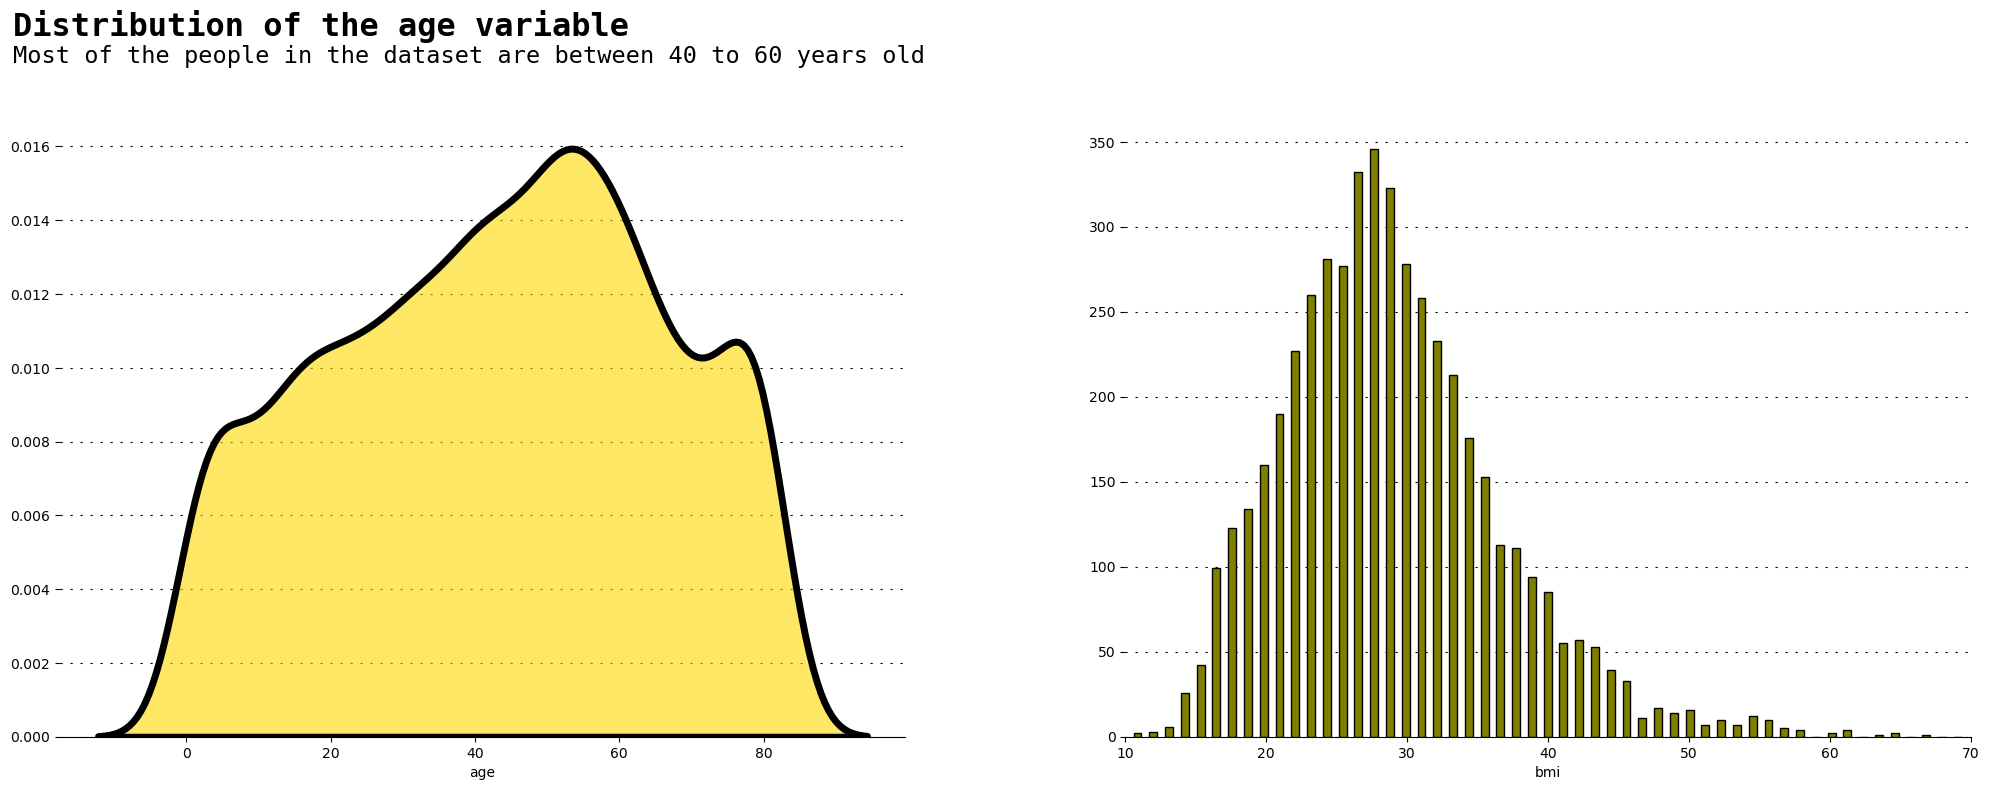

In [18]:
fig = plt.figure(figsize = (20, 8), facecolor = 'white')  # 배경색상 : 흰색
gs = fig.add_gridspec(1,2)  # 서브플롯 그리드 객체 추가

# 서브 플롯 생성 및 텍스트 추가
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

# 첫 번째 서브플롯에 텍스트 주석 추가(주석 두개) >> 좌표 정보 기입
ax[0].text(-24, 0.019, 'Distribution of the age variable',
          fontsize = 23, fontweight = 'bold', fontfamily = 'monospace')
ax[0].text(-24, 0.01826, 'Most of the people in the dataset are between 40 to 60 years old',
          fontsize = 17, fontweight = 'light', fontfamily='monospace')

# Kernel Density Estimate 플롯 그리기
# zorder=3는 KDE 플롯을 그리는 과정에서 해당 곡선이 다른 그래픽 요소들보다 더 위에 그려지도록 하는 역할
# 이로써 그래픽 요소들 간의 겹침 순서를 조정하여 시각적인 효과
sns.kdeplot(x = df['age'], ax=ax[0], shade = True, color = 'gold', alpha = 0.6,
           zorder=3, linewidth = 5, edgecolor = 'black')

# shrink 매개변수를 사용하여 히스토그램 막대의 너비를 조절
sns.histplot(x = df['bmi'], ax = ax[1], color = 'olive', alpha = 1, zorder = 2, 
            linewidth = 1, edgecolor = 'black', shrink = 0.5)

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes=(2,7))
    
    for direction in ['top', 'right', 'left']:
        ax[i].spines[direction].set_visible(False)
        
ax[1].set_xlim(10, 70)

plt.tight_layout()